In [61]:
from Helpers import helpers

# Load the data
plain_df, perturbed_df_3d = helpers.load_plain_and_perturbed_dataset(0.5, import_path='../data/heart-dataset/heart_numerical.csv', perturbed_path='../ExperimentRunners/data/3d-laplace-optimal-truncated/heart-dataset/')
print(plain_df.shape, perturbed_df_3d.shape)

(2126, 10) (2126, 3)


In [62]:
plain_df_3d = plain_df.loc[:, ['baseline value', 'histogram_min', 'accelerations']]


In [63]:
plain_df_3d.head()

,baseline value,histogram_min,accelerations
0,120.0,62.0,0.0
1,132.0,68.0,4.0
2,133.0,68.0,2.0
3,134.0,53.0,2.0
4,132.0,53.0,4.0


In [64]:
import numpy as np
import pandas as pd

def compute_euclidean_distance_between_two_rows(row1, row2):
    return np.linalg.norm(row1 - row2)
def compute_distances_between_two_datasets(df1, df2):
    distances = []
    for i in range(df1.shape[0]):
        distances.append(compute_euclidean_distance_between_two_rows(df1.iloc[i, :], df2.iloc[i, :]))
    return distances

def compute_euclidean_distances_between_two_datasets_per_epsilon(plain_df, epsilons, algorithm, dataset):
    distances = {'epsilon': [], 'distance': []}
    for epsilon in epsilons:
        perturbed_df_3d = helpers.load_dataset(f'../ExperimentRunners/data/{algorithm}/{dataset}/perturbed_{epsilon}.csv')
        distances['epsilon'].append(epsilon)
        distances['distance'].append(np.mean(compute_distances_between_two_datasets(plain_df, perturbed_df_3d)))
    df = pd.DataFrame(distances)
    df['algorithm'] = algorithm
    df['dataset'] = dataset
    return df;

def compute_all_distances_between_two_datasets(plain_df, algorithms, datasets, epsilons):
    dataframe_list = []
    for dataset in datasets:
        for algorithm in algorithms:
            dataframe_list.append(compute_euclidean_distances_between_two_datasets_per_epsilon(plain_df, epsilons, algorithm, dataset))
    return pd.concat(dataframe_list)
        

In [65]:
compute_euclidean_distances_between_two_datasets_per_epsilon(plain_df_3d, helpers.get_experiment_epsilons(), '3d-laplace-optimal-truncated', 'heart-dataset')

,epsilon,distance,algorithm,dataset
0,0.1,15.828462,3d-laplace-optimal-truncated,heart-dataset
1,0.5,5.274590,3d-laplace-optimal-truncated,heart-dataset
2,0.7,4.106307,3d-laplace-optimal-truncated,heart-dataset
3,1.0,3.167784,3d-laplace-optimal-truncated,heart-dataset
4,1.5,2.362332,3d-laplace-optimal-truncated,heart-dataset
5,2.0,1.988108,3d-laplace-optimal-truncated,heart-dataset
6,2.5,1.721067,3d-laplace-optimal-truncated,heart-dataset
7,3.0,1.553318,3d-laplace-optimal-truncated,heart-dataset
8,3.5,1.461316,3d-laplace-optimal-truncated,heart-dataset
9,5.0,1.226422,3d-laplace-optimal-truncated,heart-dataset


In [71]:
epsilons = helpers.get_experiment_epsilons()

In [101]:
distances_for_3d = compute_all_distances_between_two_datasets(plain_df_3d, ['3d-laplace-optimal-truncated', '3d-laplace', '3d-laplace-truncated', '3d-piecewise'], ['heart-dataset'], epsilons)

In [135]:
from matplotlib import pyplot as plt
import seaborn as sns

def create_lineplot_of_different_algorithms(df:pd.DataFrame, title, xlabel, ylabel, safe_path = None):
    
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(15, 5))
    ax = sns.lineplot(x="epsilon", y="distance", hue="algorithm", data=df, ax=ax, style='algorithm', markers=True)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(df['epsilon'].unique())
    ax.set_xticklabels(df['epsilon'].unique(), rotation=45)
    ax.set_yscale('log')
    if(safe_path is not None):
        plt.savefig(safe_path)
    plt.show()



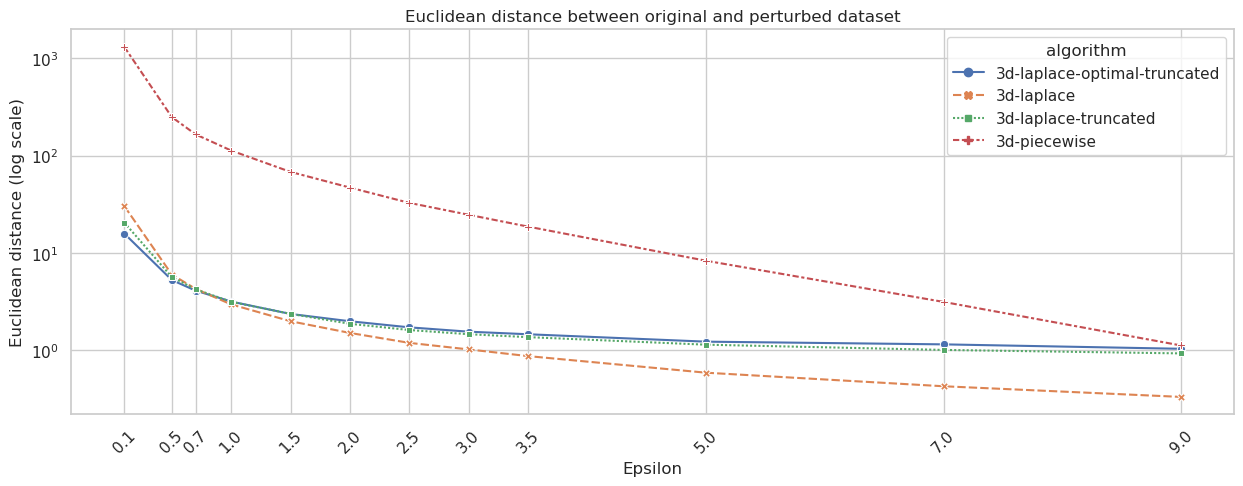

In [136]:
create_lineplot_of_different_algorithms(distances_for_3d, 'Euclidean distance between original and perturbed dataset', 'Epsilon', 'Euclidean distance (log scale)')